In [1]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

Welcome to JupyROOT 6.18/00


In [2]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [3]:
file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/LeadK/rootfiles/DQ_250GeV_test.root")
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/LeadK/rootfiles/DQ_250GeV_OppChg.root")

In [4]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetLineColor(color)
    p.SetFillColor(color)
    p.SetFillStyle(3003)
    p.SetMarkerStyle(1)
    p.SetMarkerSize(0.2)
    p.SetTitle("")

def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in gDirectory.GetListOfKeys()]

In [5]:
TFile.GetKeyNames = GetKeyNames
keyList = file1.GetKeyNames()
print(keyList)

['h_mc_stable_nKaons_evt', 'h_mc_stable_Kaon_cos', 'h_pfo_nKaons_evt', 'h_pfo_nKaons_evt_dd', 'h_pfo_nKaons_evt_ss', 'h_pfo_nKaons_evt_uu', 'h_pfo_nKaons_jet', 'h_pfo_nKaons_jet_ss', 'h_pfo_nKaons_jet_uu', 'h_pfo_Kaon_cos', 'h_pfo_LeadKaons_cos', 'h_pfo_LeadPFO_pid', 'h_pfo_LeadPFO_pid_parent', 'h_pfo_nKaons_sec_evt', 'h_pfo_LeadKp_p', 'h_pfo_LeadKm_p', 'h_pfo_LeadPip_p', 'h_pfo_LeadPim_p', 'h_pfo_LeadK_p_ss', 'h_pfo_LeadK_p_uu', 'h_pfo_LeadPFO_p_pid', 'h_pfo_LeadKaon_p', 'h_pfo_LeadPi_p']


In [6]:
h_pfo_LeadK_p_ss = file1.Get("h_pfo_LeadK_p_ss")
h_pfo_LeadK_p_uu = file1.Get("h_pfo_LeadK_p_uu")

makePretty(h_pfo_LeadK_p_ss,kRed)
makePretty(h_pfo_LeadK_p_uu,kBlue)

### Leading K momentum (not normalized)

In [7]:
c1 = TCanvas("c1","c1",500,500)

In [8]:
h_pfo_LeadK_p_ss.Draw("h")
h_pfo_LeadK_p_uu.Draw("hsame")

In [9]:
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_LeadK_p_uu,"u#bar{u}","fp")
leg.AddEntry(h_pfo_LeadK_p_ss,"s#bar{s}","fp")
leg.Draw()

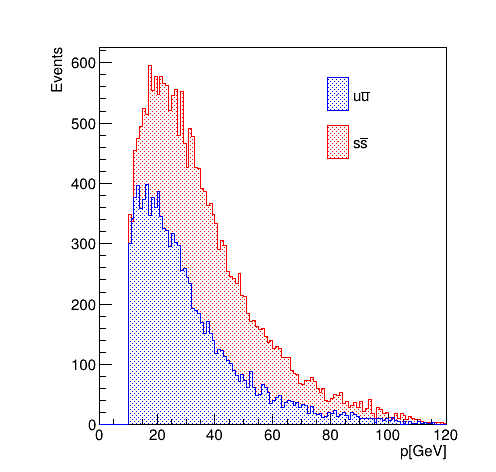

In [10]:
c1.Draw()

### Leading K momentum (normalized)

In [11]:
h_pfo_LeadK_p_ss.Sumw2()
h_pfo_LeadK_p_uu.Sumw2()

In [12]:
h_pfo_LeadK_p_ss.Scale(1.0/h_pfo_LeadK_p_ss.GetEntries())
h_pfo_LeadK_p_uu.Scale(1.0/h_pfo_LeadK_p_uu.GetEntries())

In [13]:
c2 = TCanvas("c2","c2",500,500)

In [14]:
h_pfo_LeadK_p_uu.GetYaxis().SetRangeUser(0,0.04)

h_pfo_LeadK_p_uu.Draw("h")
h_pfo_LeadK_p_ss.Draw("hsame")

In [15]:
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_LeadK_p_uu,"u#bar{u}","fp")
leg.AddEntry(h_pfo_LeadK_p_ss,"s#bar{s}","fp")
leg.Draw()

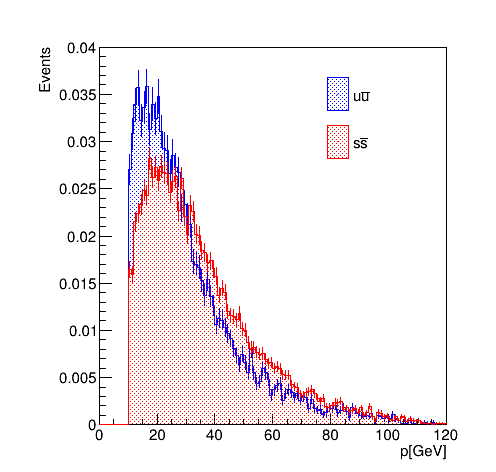

In [16]:
c2.Draw()